In [1]:
from nn import *
from viz import plot_history
from metrics import accuracy
from tools import train_test_split, load, save, binary_encoder

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
from tools import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
model = NeuralNetwork(loss='binary_crossentropy', verbose=True)
model.add(Dense(1, activation=Sigmoid()))

In [9]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

[10/10]: loss=0.33186 


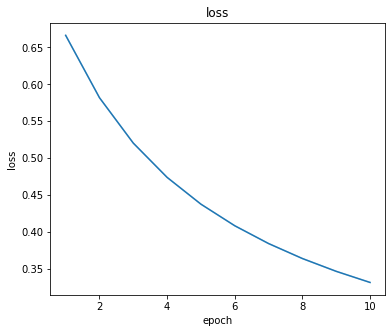

In [11]:
h = model.fit(X_normed, y_train, n_epochs=10)
plot_history(h)

In [12]:
accuracy(y_test, model.predict(X_test_normed) > .5)

0.9361702127659575

In [13]:
model = NeuralNetwork(loss=BinaryCrossEntropy(), verbose=True, verbose_step=25)
model.add(Dense(30, activation=Relu(), dropout_rate=.25))
model.add(Dense(1, activation=Sigmoid()))

In [14]:
es = EarlyStopping(monitor='val_loss')

h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10000, callbacks=[es], metrics=[accuracy], reinitialize=False)

[25/10000]: loss=0.67152 val_loss=0.67651 accuracy=0.63947 val_accuracy=0.60638 
[50/10000]: loss=0.64265 val_loss=0.65260 accuracy=0.63947 val_accuracy=0.60638 
[75/10000]: loss=0.55058 val_loss=0.56372 accuracy=0.79474 val_accuracy=0.78723 
[100/10000]: loss=0.36657 val_loss=0.39203 accuracy=0.93684 val_accuracy=0.92021 
[125/10000]: loss=0.24854 val_loss=0.27983 accuracy=0.94737 val_accuracy=0.92553 
[150/10000]: loss=0.18200 val_loss=0.20395 accuracy=0.95263 val_accuracy=0.93617 
[175/10000]: loss=0.14702 val_loss=0.18265 accuracy=0.96053 val_accuracy=0.94149 
[200/10000]: loss=0.12825 val_loss=0.16453 accuracy=0.96842 val_accuracy=0.95745 
Early stopping!


In [15]:
accuracy(y_test, model.predict(X_test_normed))

0.9574468085106383

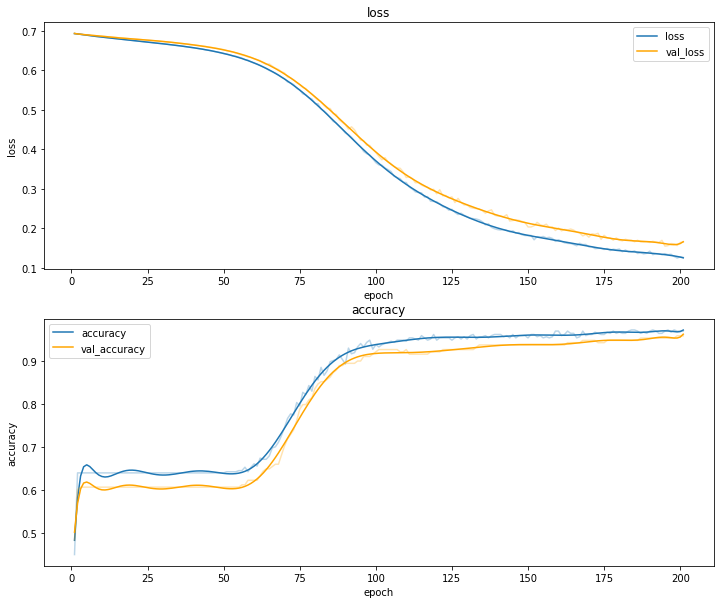

In [16]:
plot_history(h)

In [17]:
model.summary()

|Dense(30, 30, relu)              	|	930
|Dense(30, 1, sigmoid)               	|	31
Total number of parameters:		 961
Total number of trainable params:	 961


In [18]:
from tools import load, save

save(model, 'neural_net.pcl')

In [19]:
nn = load('neural_net.pcl')

In [20]:
nn.summary()

|Dense(30, 30, relu)              	|	930
|Dense(30, 1, sigmoid)               	|	31
Total number of parameters:		 961
Total number of trainable params:	 961


In [21]:
accuracy(y_test, nn.predict(X_test_normed))

0.9574468085106383